# Lista 8
Igor Tryhub, 275235

## Zad.1

# Wprowadzenie

Skrypt pokazuje jak użyć pakietu SciKit do wizualizacji danych na przykładzie zestawu danych zawierającego obrazy cyfr pisanych ręcznie.

In [2]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

In [51]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in xrange(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

In [61]:
def subplot_digits(X, y, figsize, titles):
    
    plt.figure(figsize=(figsize[0], figsize[1]))
    
    for i, svd_solver in enumerate(titles):
        plt.subplot((len(titles)-1)/2+1, 2, i + 1)
        X = decomposition.PCA(n_components=2, svd_solver=svd_solver).fit_transform(X)
        X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))
        for i in xrange(X.shape[0]):
            plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})
        plt.title('svd_solver = {0}'.format(svd_solver))
        plt.tight_layout()
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Wczytanie danych

In [9]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

# Wyświetlenie przykładowych cyfr

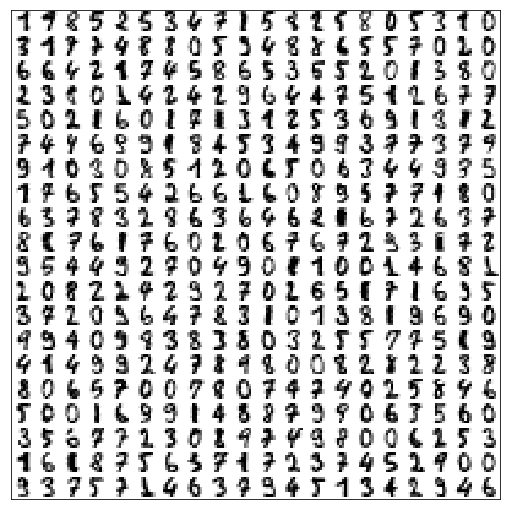

In [37]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in xrange(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

# Rzut na dwie losowo wybrane osie

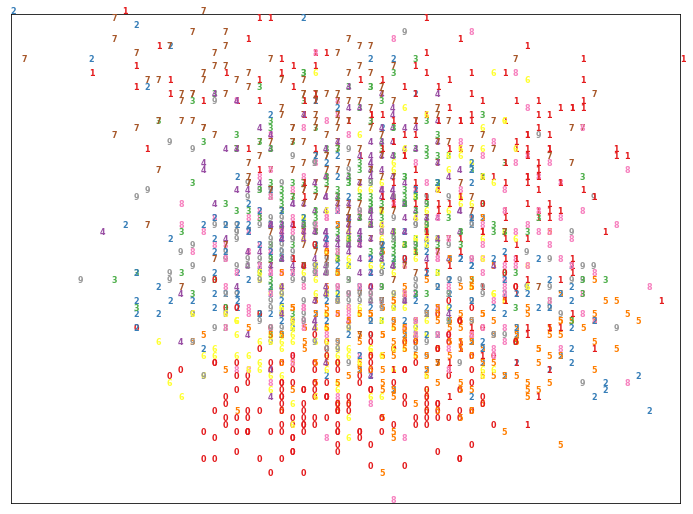

In [44]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
plot_digits(X_projected, digits.target)

# Principal Component Analysis (PCA)

### svd_solver : string {‘auto’, ‘full’, ‘arpack’, ‘randomized’}

    auto: the solver is selected by a default policy based on X.shape and n_components: if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ‘randomized’ method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards.
    
    full: run exact full SVD calling the standard LAPACK solver via scipy.linalg.svd and select the components by postprocessing
    
    arpack: run SVD truncated to n_components calling ARPACK solver via scipy.sparse.linalg.svds. It requires strictly 0 < n_components < X.shape[1]
    
    randomized: run randomized SVD by the method of Halko et al.



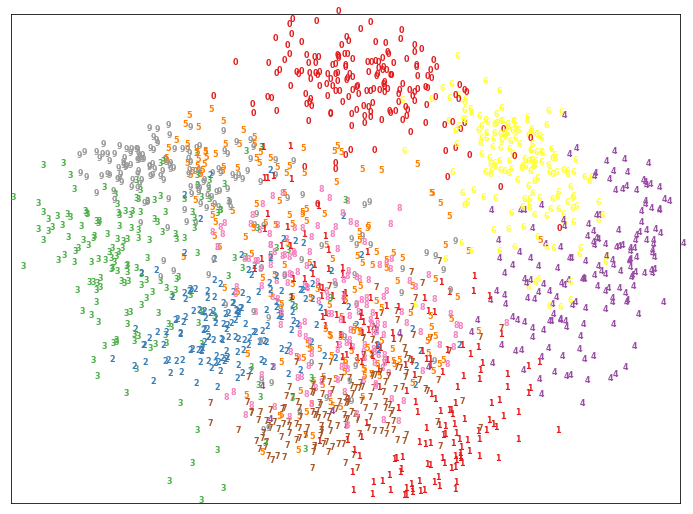

In [68]:
X_pca = decomposition.PCA(n_components=2, svd_solver='auto').fit_transform(X)
plot_digits(X_pca, digits.target)

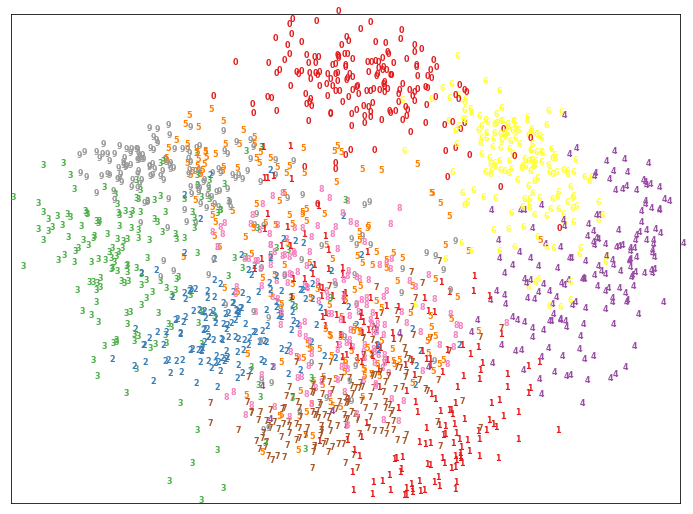

In [70]:
X_pca = decomposition.PCA(n_components=2, svd_solver='full').fit_transform(X)
plot_digits(X_pca, digits.target)

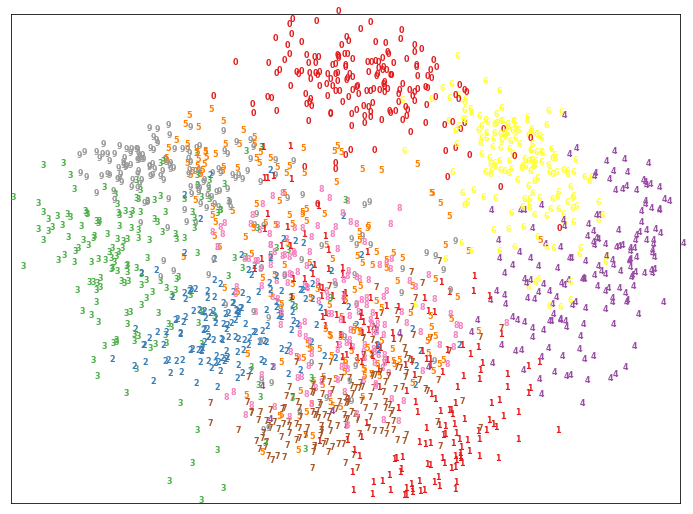

In [71]:
X_pca = decomposition.PCA(n_components=2, svd_solver='arpack').fit_transform(X)
plot_digits(X_pca, digits.target)

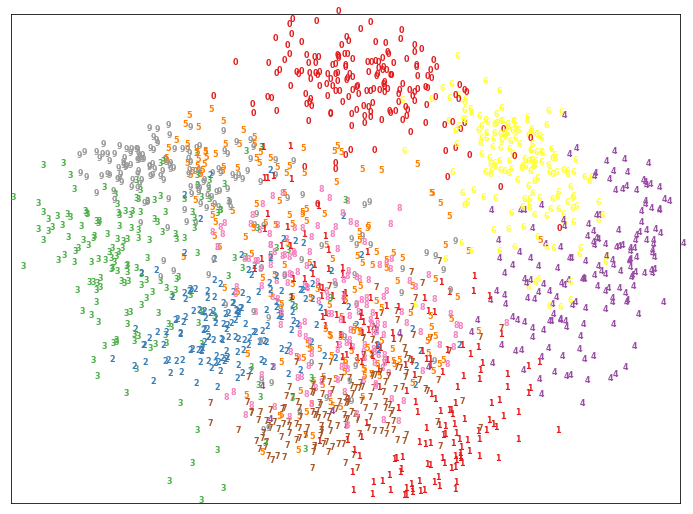

In [72]:
X_pca = decomposition.PCA(n_components=2, svd_solver='randomized').fit_transform(X)
plot_digits(X_pca, digits.target)

# Kernel Principal Component Analysis (KPCA)

### kernel : “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”

    Kernel. Default=”linear”.

### gamma : float, default=1/n_features

    Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other kernels.


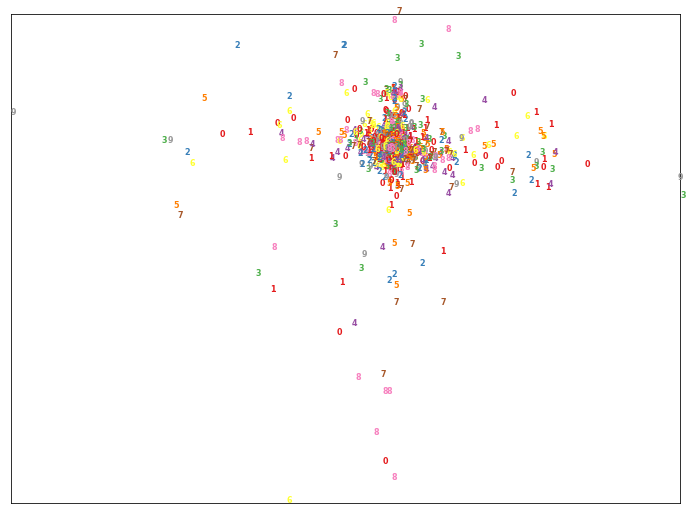

In [93]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

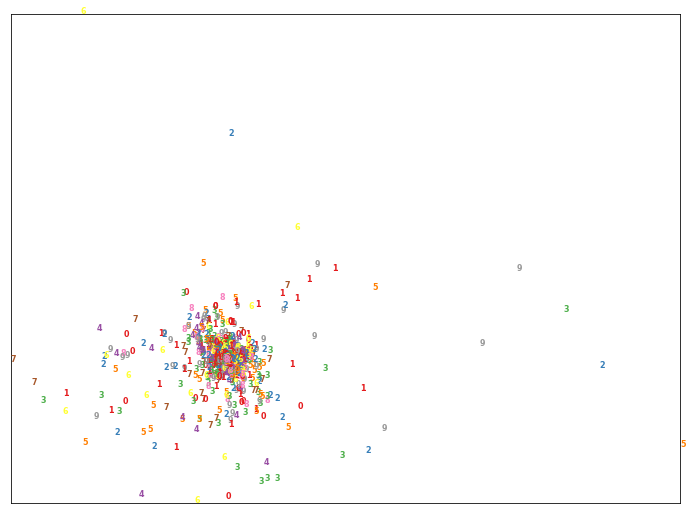

In [94]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=2).fit_transform(X)
plot_digits(X_kpca, digits.target)

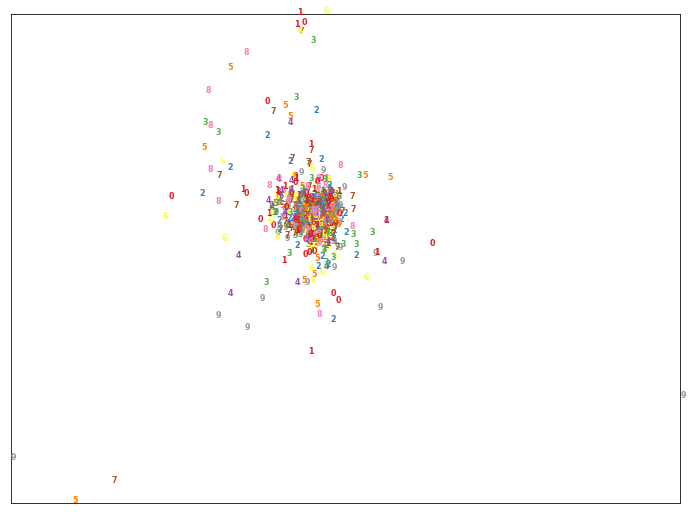

In [96]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=50).fit_transform(X)
plot_digits(X_kpca, digits.target)

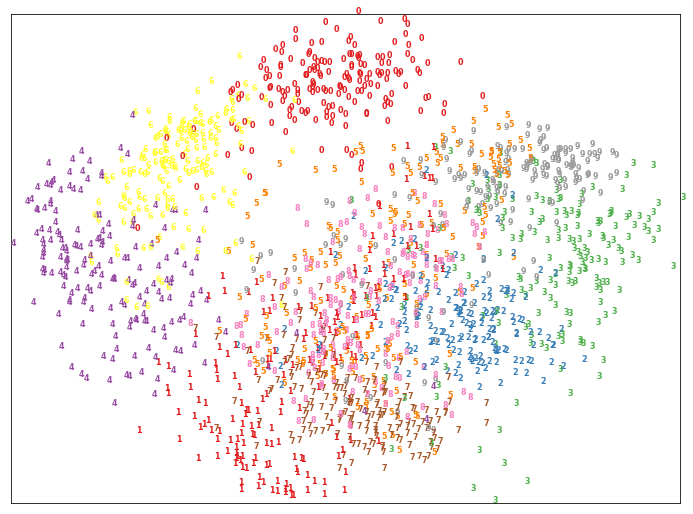

In [97]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="linear", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

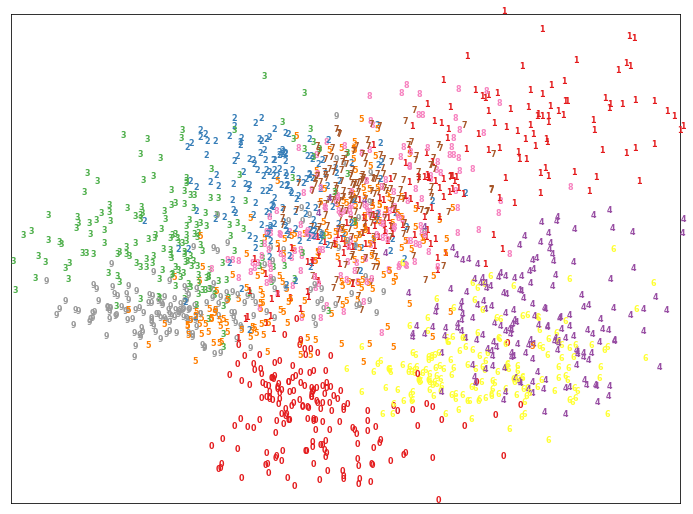

In [100]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="poly", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

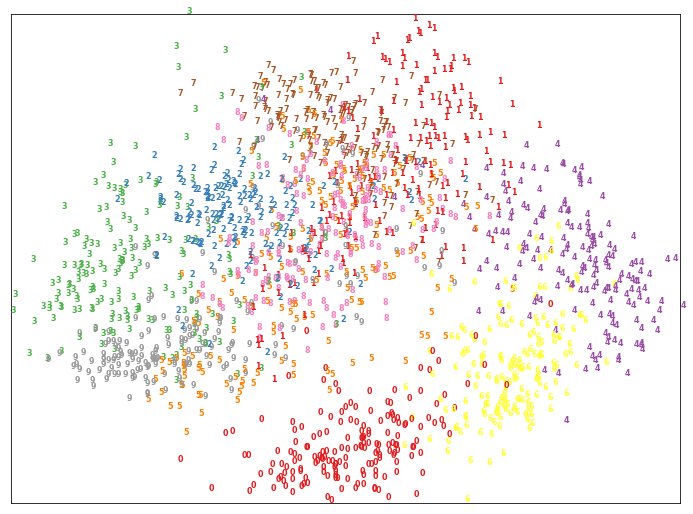

In [102]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="cosine", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

# Isomap

### n_neighbors : integer

    number of neighbors to consider for each point.

### path_method : string [‘auto’|’FW’|’D’]

    Method to use in finding shortest path.

    ‘auto’ : attempt to choose the best algorithm automatically.

    ‘FW’ : Floyd-Warshall algorithm.

    ‘D’ : Dijkstra’s algorithm.


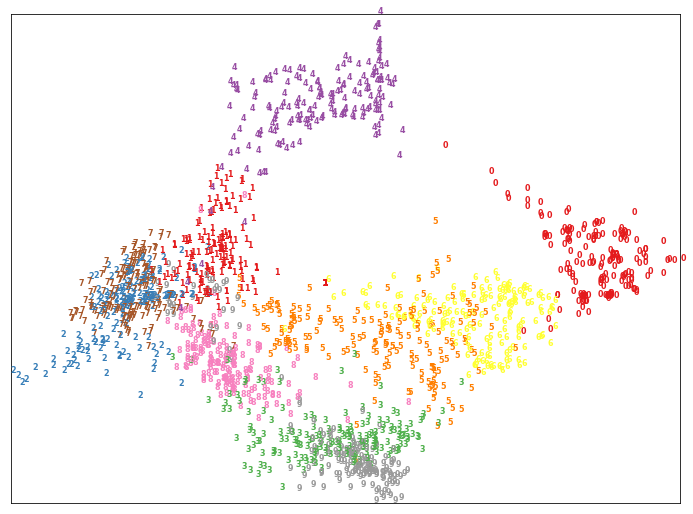

In [106]:
X_iso = manifold.Isomap(n_neighbors=5, n_components=2, path_method='auto').fit_transform(X)
plot_digits(X_iso, digits.target)

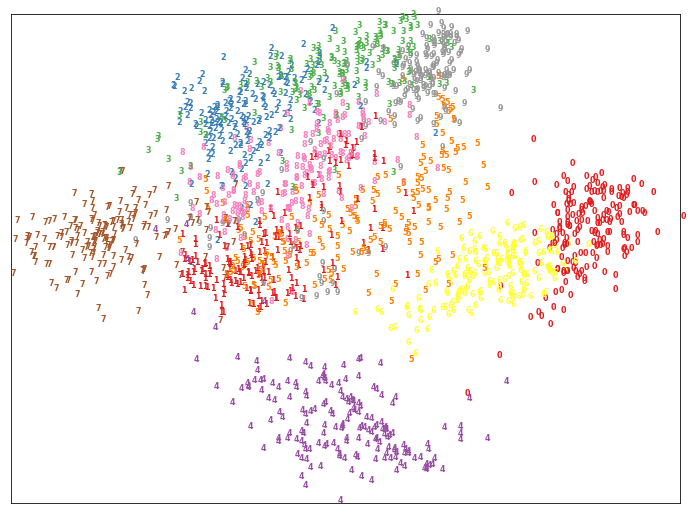

In [107]:
X_iso = manifold.Isomap(n_neighbors=30, n_components=2, path_method='auto').fit_transform(X)
plot_digits(X_iso, digits.target)

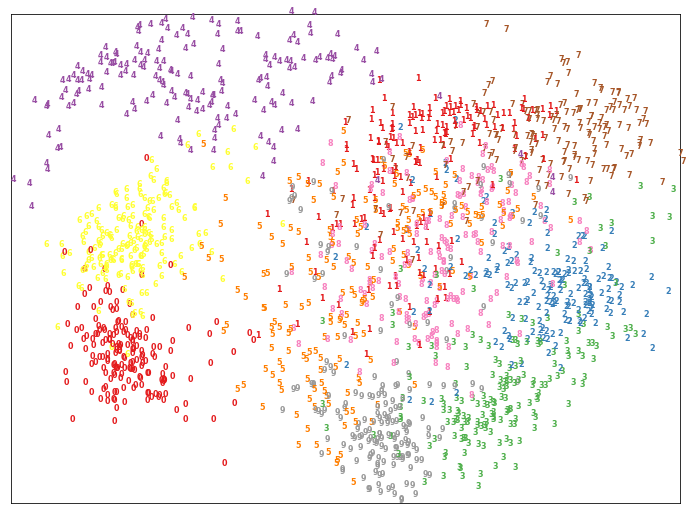

In [108]:
X_iso = manifold.Isomap(n_neighbors=100, n_components=2, path_method='auto').fit_transform(X)
plot_digits(X_iso, digits.target)

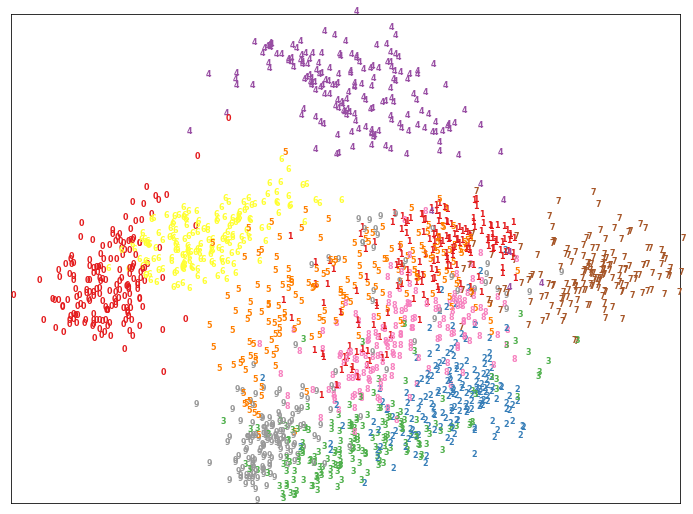

In [109]:
X_iso = manifold.Isomap(n_neighbors=30, n_components=2, path_method='FW').fit_transform(X)
plot_digits(X_iso, digits.target)

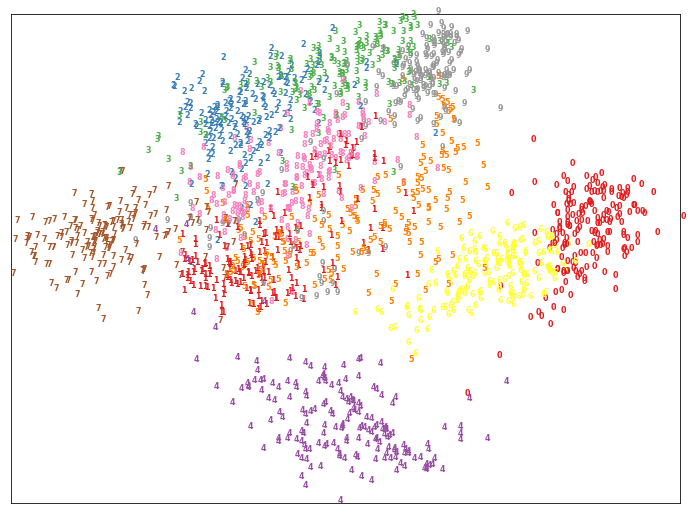

In [110]:
X_iso = manifold.Isomap(n_neighbors=30, n_components=2, path_method='D').fit_transform(X)
plot_digits(X_iso, digits.target)

# Locally Linear Embedding (LLE)

### n_neighbors : integer

    number of neighbors to consider for each point.

### method : {‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}

    standard : use the standard locally linear embedding algorithm.

    hessian : use the Hessian eigenmap method. This method requires
        n_neighbors > n_components * (1 + (n_components + 1) / 2. 
        
    modified : use the modified locally linear embedding algorithm.

    ltsa : use local tangent space alignment algorithm.

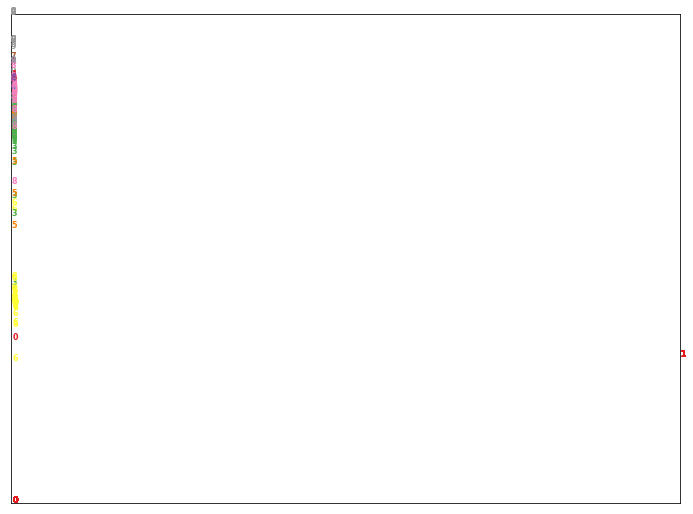

In [112]:
X_lle = manifold.LocallyLinearEmbedding(5, n_components=2, method='standard').fit_transform(X)
plot_digits(X_lle, digits.target)

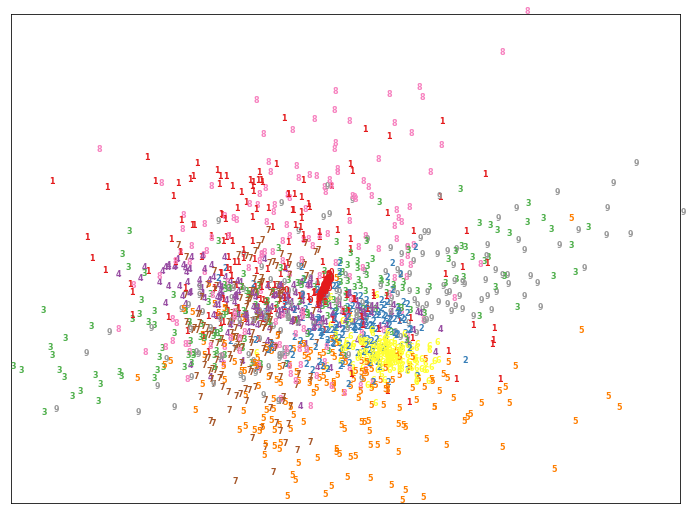

In [113]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2, method='standard').fit_transform(X)
plot_digits(X_lle, digits.target)

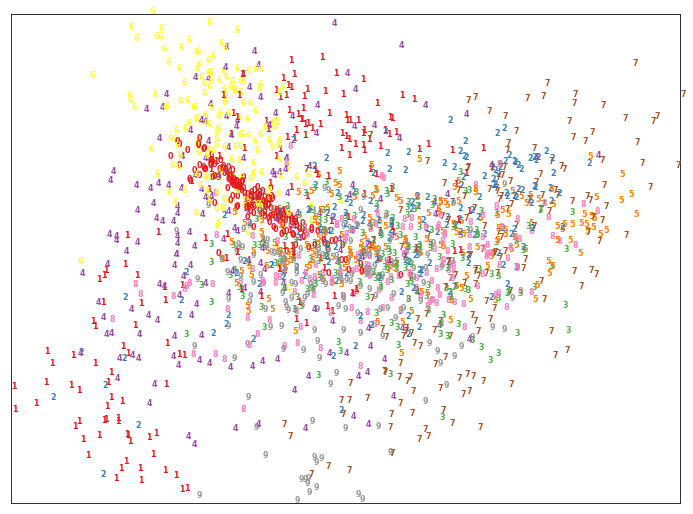

In [114]:
X_lle = manifold.LocallyLinearEmbedding(100, n_components=2, method='standard').fit_transform(X)
plot_digits(X_lle, digits.target)

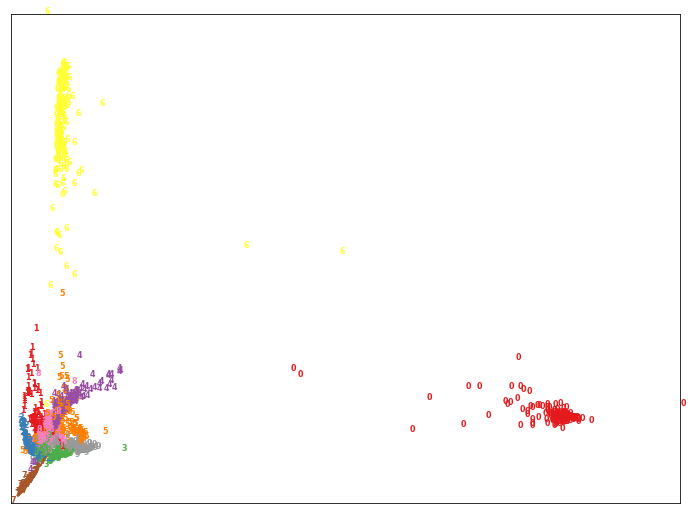

In [115]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2, method='hessian').fit_transform(X)
plot_digits(X_lle, digits.target)

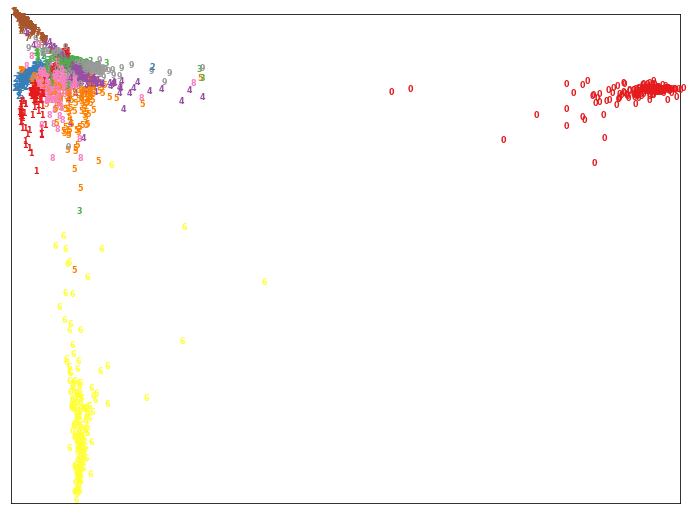

In [116]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2, method='modified').fit_transform(X)
plot_digits(X_lle, digits.target)

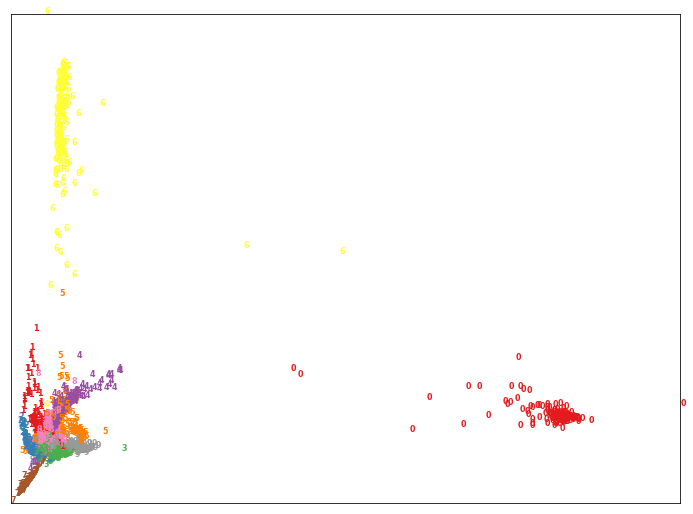

In [117]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2, method='ltsa').fit_transform(X)
plot_digits(X_lle, digits.target)

# Multidimensional Scaling (MDS)

### metric : boolean, optional, default: True

    If True, perform metric MDS; otherwise, perform nonmetric MDS.

### n_init : int, optional, default: 4

    Number of times the SMACOF algorithm will be run with different initializations. The final results will be the best output of the runs, determined by the run with the smallest final stress.

### max_iter : int, optional, default: 300

    Maximum number of iterations of the SMACOF algorithm for a single run.


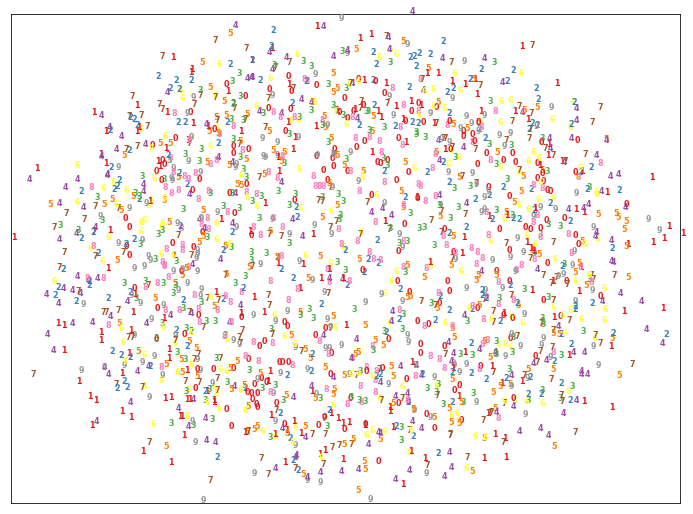

In [120]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=5).fit_transform(X)
plot_digits(X_mds, digits.target)

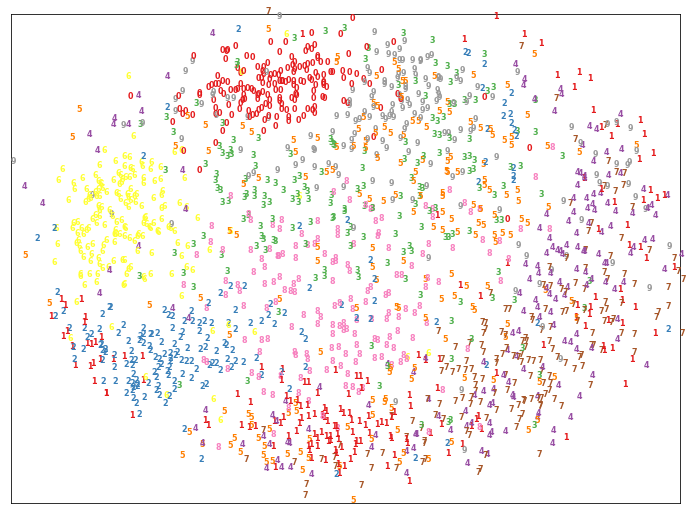

In [118]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

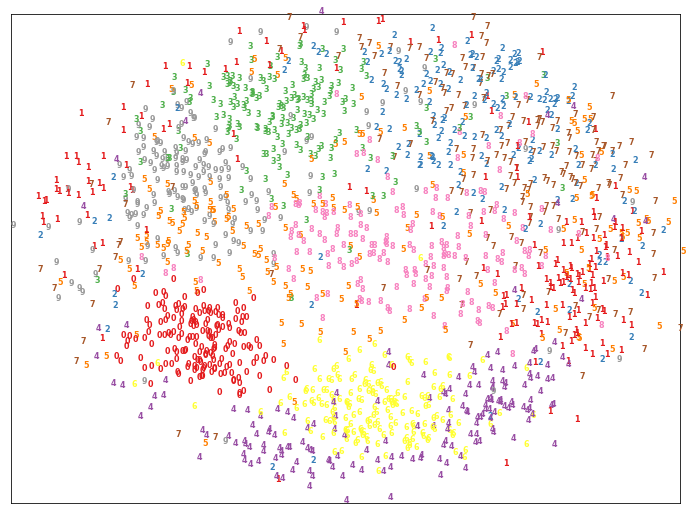

In [123]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100, metric='False').fit_transform(X)
plot_digits(X_mds, digits.target)

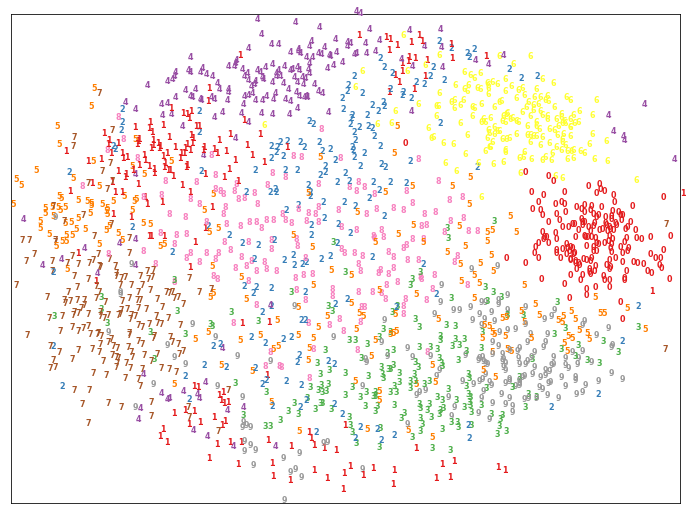

In [119]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=300).fit_transform(X)
plot_digits(X_mds, digits.target)

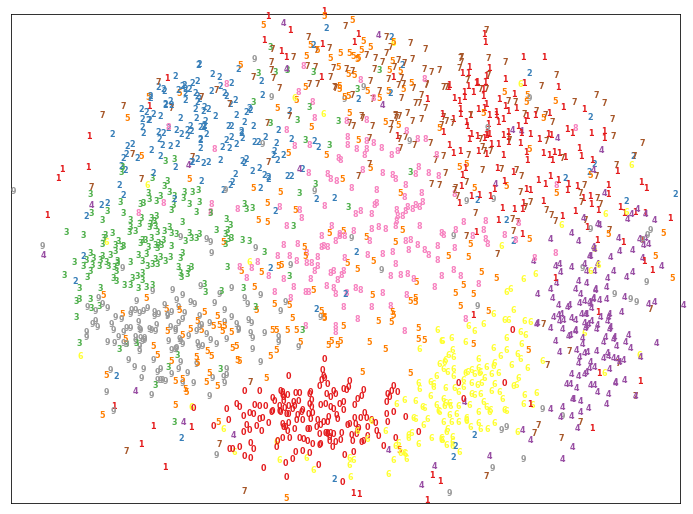

In [121]:
X_mds = manifold.MDS(n_components=2, n_init=4, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

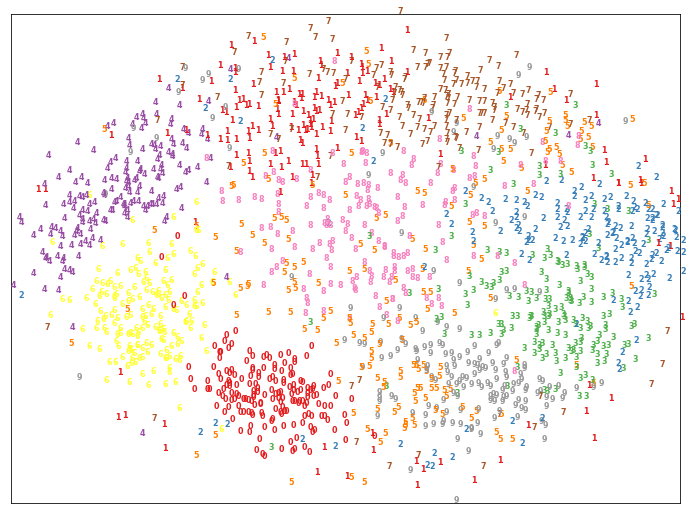

In [122]:
X_mds = manifold.MDS(n_components=2, n_init=10, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

# t-distributed Stochastic Neighbor Embedding (t-SNE)

### perplexity : float, optional (default: 30)

    The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. The choice is not extremely critical since t-SNE is quite insensitive to this parameter.

### init : string or numpy array, optional (default: “random”)

    Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.


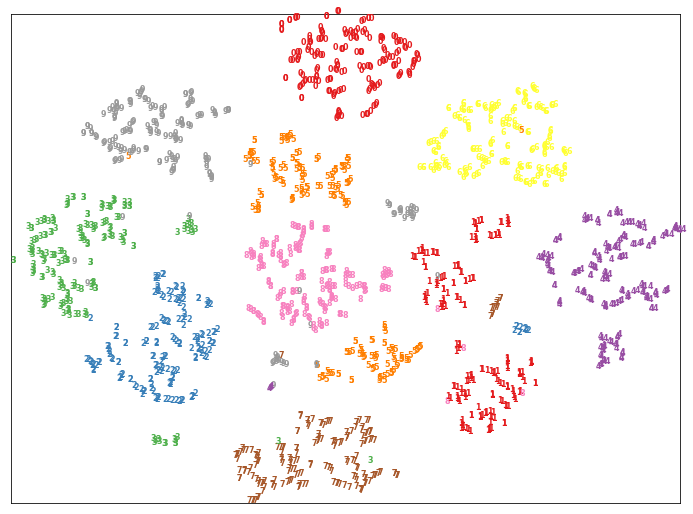

In [124]:
X_tsne = manifold.TSNE(n_components=2, init='pca', perplexity=5).fit_transform(X)
plot_digits(X_tsne, digits.target)

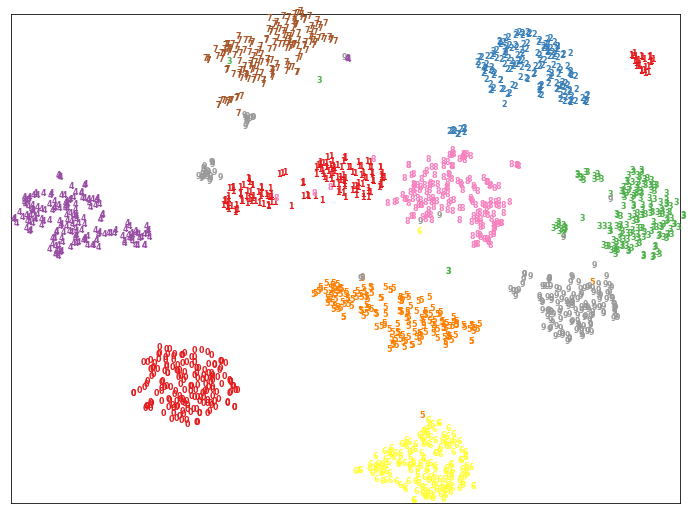

In [127]:
X_tsne = manifold.TSNE(n_components=2, init='random', perplexity=30).fit_transform(X)
plot_digits(X_tsne, digits.target)

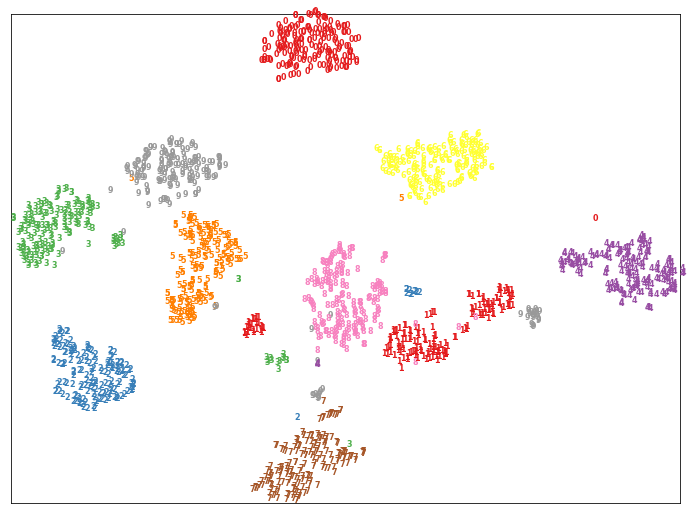

In [125]:
X_tsne = manifold.TSNE(n_components=2, init='pca', perplexity=30).fit_transform(X)
plot_digits(X_tsne, digits.target)

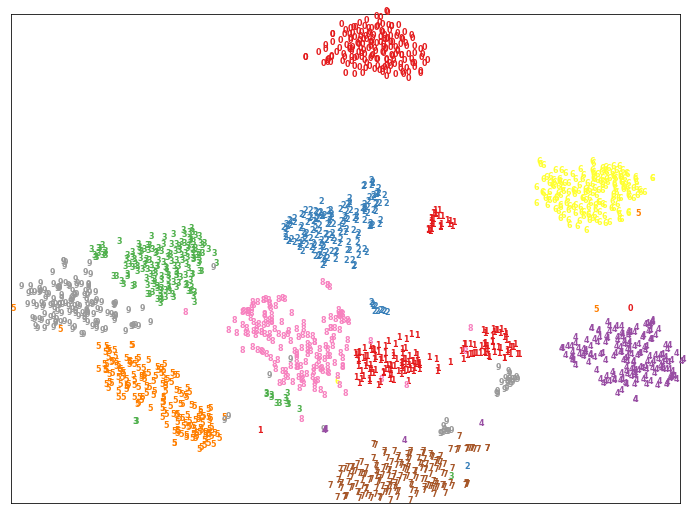

In [126]:
X_tsne = manifold.TSNE(n_components=2, init='pca', perplexity=100).fit_transform(X)
plot_digits(X_tsne, digits.target)

## Zad.2

In [197]:
from sklearn.neighbors import KNeighborsClassifier
digits = datasets.load_digits()
X = digits.data
y = digits.target
k=5

In [208]:
def KNN_error(k, y, X0):
    KNN = KNeighborsClassifier()
    KNN.fit(X0, y)
    err = 100.0*(KNN.predict(X0)!=y).sum()/y.size
    print("\tError rate: {0:.2f}%".format(err))

In [209]:
print("Original dataset:")
KNN_error(k, y, X)

Original dataset:
	Error rate: 0.95%


In [210]:
n = 2
print("For {} dimension of the embedded space:\n".format(n))

print("PCA:")
X_pca = decomposition.PCA(n_components=n, svd_solver='auto').fit_transform(X)
KNN_error(k, y, X_pca)
print("KPCA:")
X_kpca = decomposition.KernelPCA(n_components=n, kernel="linear", gamma=10).fit_transform(X)
KNN_error(k, y, X_kpca)
print("Isomap:")
X_iso = manifold.Isomap(n_neighbors=30, n_components=n, path_method='D').fit_transform(X)
KNN_error(k, y, X_iso)
print("LLE:")
X_lle = manifold.LocallyLinearEmbedding(30, n_components=n, method='ltsa').fit_transform(X)
KNN_error(k, y, X_lle)
print("MDS:")
X_mds = manifold.MDS(n_components=n, n_init=10, max_iter=100).fit_transform(X)
KNN_error(k, y, X_mds)
print("t-SNE:")
X_tsne = manifold.TSNE(n_components=n, init='pca', perplexity=30).fit_transform(X)
KNN_error(k, y, X_tsne)

For 2 dimension of the embedded space:

PCA:
	Error rate: 26.99%
KPCA:
	Error rate: 26.99%
Isomap:
	Error rate: 19.03%
LLE:
	Error rate: 12.63%
MDS:
	Error rate: 21.70%
t-SNE:
	Error rate: 0.95%


In [212]:
n = 3
print("For {} dimension of the embedded space:\n".format(n))

print("PCA:")
X_pca = decomposition.PCA(n_components=n, svd_solver='auto').fit_transform(X)
KNN_error(k, y, X_pca)
print("KPCA:")
X_kpca = decomposition.KernelPCA(n_components=n, kernel="linear", gamma=10).fit_transform(X)
KNN_error(k, y, X_kpca)
print("Isomap:")
X_iso = manifold.Isomap(n_neighbors=30, n_components=n, path_method='D').fit_transform(X)
KNN_error(k, y, X_iso)
print("LLE:")
X_lle = manifold.LocallyLinearEmbedding(30, n_components=n, method='ltsa').fit_transform(X)
KNN_error(k, y, X_lle)
print("MDS:")
X_mds = manifold.MDS(n_components=n, n_init=10, max_iter=100).fit_transform(X)
KNN_error(k, y, X_mds)
print("t-SNE:")
X_tsne = manifold.TSNE(n_components=n, init='pca', perplexity=30).fit_transform(X)
KNN_error(k, y, X_tsne)

For 3 dimension of the embedded space:

PCA:
	Error rate: 16.08%
KPCA:
	Error rate: 16.08%
Isomap:
	Error rate: 9.02%
LLE:
	Error rate: 6.46%
MDS:
	Error rate: 15.53%
t-SNE:
	Error rate: 1.11%


In [213]:
n = 10
print("For {} dimension of the embedded space:\n".format(n))

print("PCA:")
X_pca = decomposition.PCA(n_components=n, svd_solver='auto').fit_transform(X)
KNN_error(k, y, X_pca)
print("KPCA:")
X_kpca = decomposition.KernelPCA(n_components=n, kernel="linear", gamma=10).fit_transform(X)
KNN_error(k, y, X_kpca)
print("Isomap:")
X_iso = manifold.Isomap(n_neighbors=30, n_components=n, path_method='D').fit_transform(X)
KNN_error(k, y, X_iso)
print("LLE:")
X_lle = manifold.LocallyLinearEmbedding(30, n_components=n, method='ltsa').fit_transform(X)
KNN_error(k, y, X_lle)
print("MDS:")
X_mds = manifold.MDS(n_components=n, n_init=10, max_iter=100).fit_transform(X)
KNN_error(k, y, X_mds)

For 10 dimension of the embedded space:

PCA:
	Error rate: 1.56%
KPCA:
	Error rate: 1.56%
Isomap:
	Error rate: 1.34%
LLE:
	Error rate: 2.34%
MDS:
	Error rate: 6.23%
